In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 17067 (delta 22), reused 23 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 21.48 MiB/s, done.
Resolving deltas: 100% (11716/11716), done.
/content/yolov5


In [ ]:
%reset -f

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 23.7 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image, clear_output
from utils.downloads import attempt_download

if torch.cuda.is_available():
    device_properties = torch.cuda.get_device_properties(0)
    print(f"Setup complete. Using torch {torch.__version__} with GPU: {device_properties.name}")
else:
    print(f"Setup complete. Using torch {torch.__version__} on CPU.")


Setup complete. Using torch 2.5.1+cu121 with GPU: Tesla T4


In [ ]:
%ls /content/yolov5/utils

activations.py    aws/            downloads.py        __init__.py  plots.py        triton.py
augmentations.py  callbacks.py    flask_rest_api/     loggers/     __pycache__/
autoanchor.py     dataloaders.py  general.py          loss.py      segment/
autobatch.py      docker/         google_app_engine/  metrics.py   torch_utils.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8B4jKtJZV0OXUqjvjyO3")
project = rf.workspace("wildlife-2qlrs").project("wildlife-detection-nvoaq")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildlife-detection-4 in yolov5pytorch:: 100%|██████████| 6822/6822 [00:01<00:00, 5932.04it/s]


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
dataset.location

'/content/yolov5/Wildlife-detection-4'

In [ ]:
%cat /content/yolov5/Wildlife-detection-4/data.yaml

names:
- Bear
- Cheetah
- Elephants
- Humans
- Lions
- Tigers
- Vehicles
- rock
nc: 8
roboflow:
  license: CC BY 4.0
  project: wildlife-detection-nvoaq
  url: https://universe.roboflow.com/wildlife-2qlrs/wildlife-detection-nvoaq/dataset/4
  version: 4
  workspace: wildlife-2qlrs
test: ../test/images
train: Wildlife-detection-4/train/images
val: Wildlife-detection-4/valid/images


In [ ]:
import yaml
with open(dataset.location + "/data.yaml", "r") as stream:
  num_classes = str(yaml.safe_load(stream)["nc"])

In [ ]:
with open(dataset.location + "/data.yaml", "r") as stream1:
  names = str(yaml.safe_load(stream1)["names"])
names

"['Bear', 'Cheetah', 'Elephants', 'Humans', 'Lions', 'Tigers', 'Vehicles', 'rock']"

In [ ]:
%cat /content/yolov5/models/yolov5m.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, "w") as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/yolov5m.yaml
# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 412 --batch 8 --epochs 120 --data {dataset.location}/data.yaml --cfg ./models/yolov5m.yaml --weights 'yolov5m.pt' --name yolov5m_results --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
    113/119      2.04G    0.01843    0.01242   0.001621         29        416:  13% 48/360 [00:07<00:43,  7.17it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    113/119      2.04G     0.0184     0.0123   0.001606         20        416:  14% 49/360 [00:07<00:49,  6.23it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    113/119      2.04G     0.0184    0.01222   0.001597         22        416:  14% 50/360 [00:07<00:47,  6.58it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

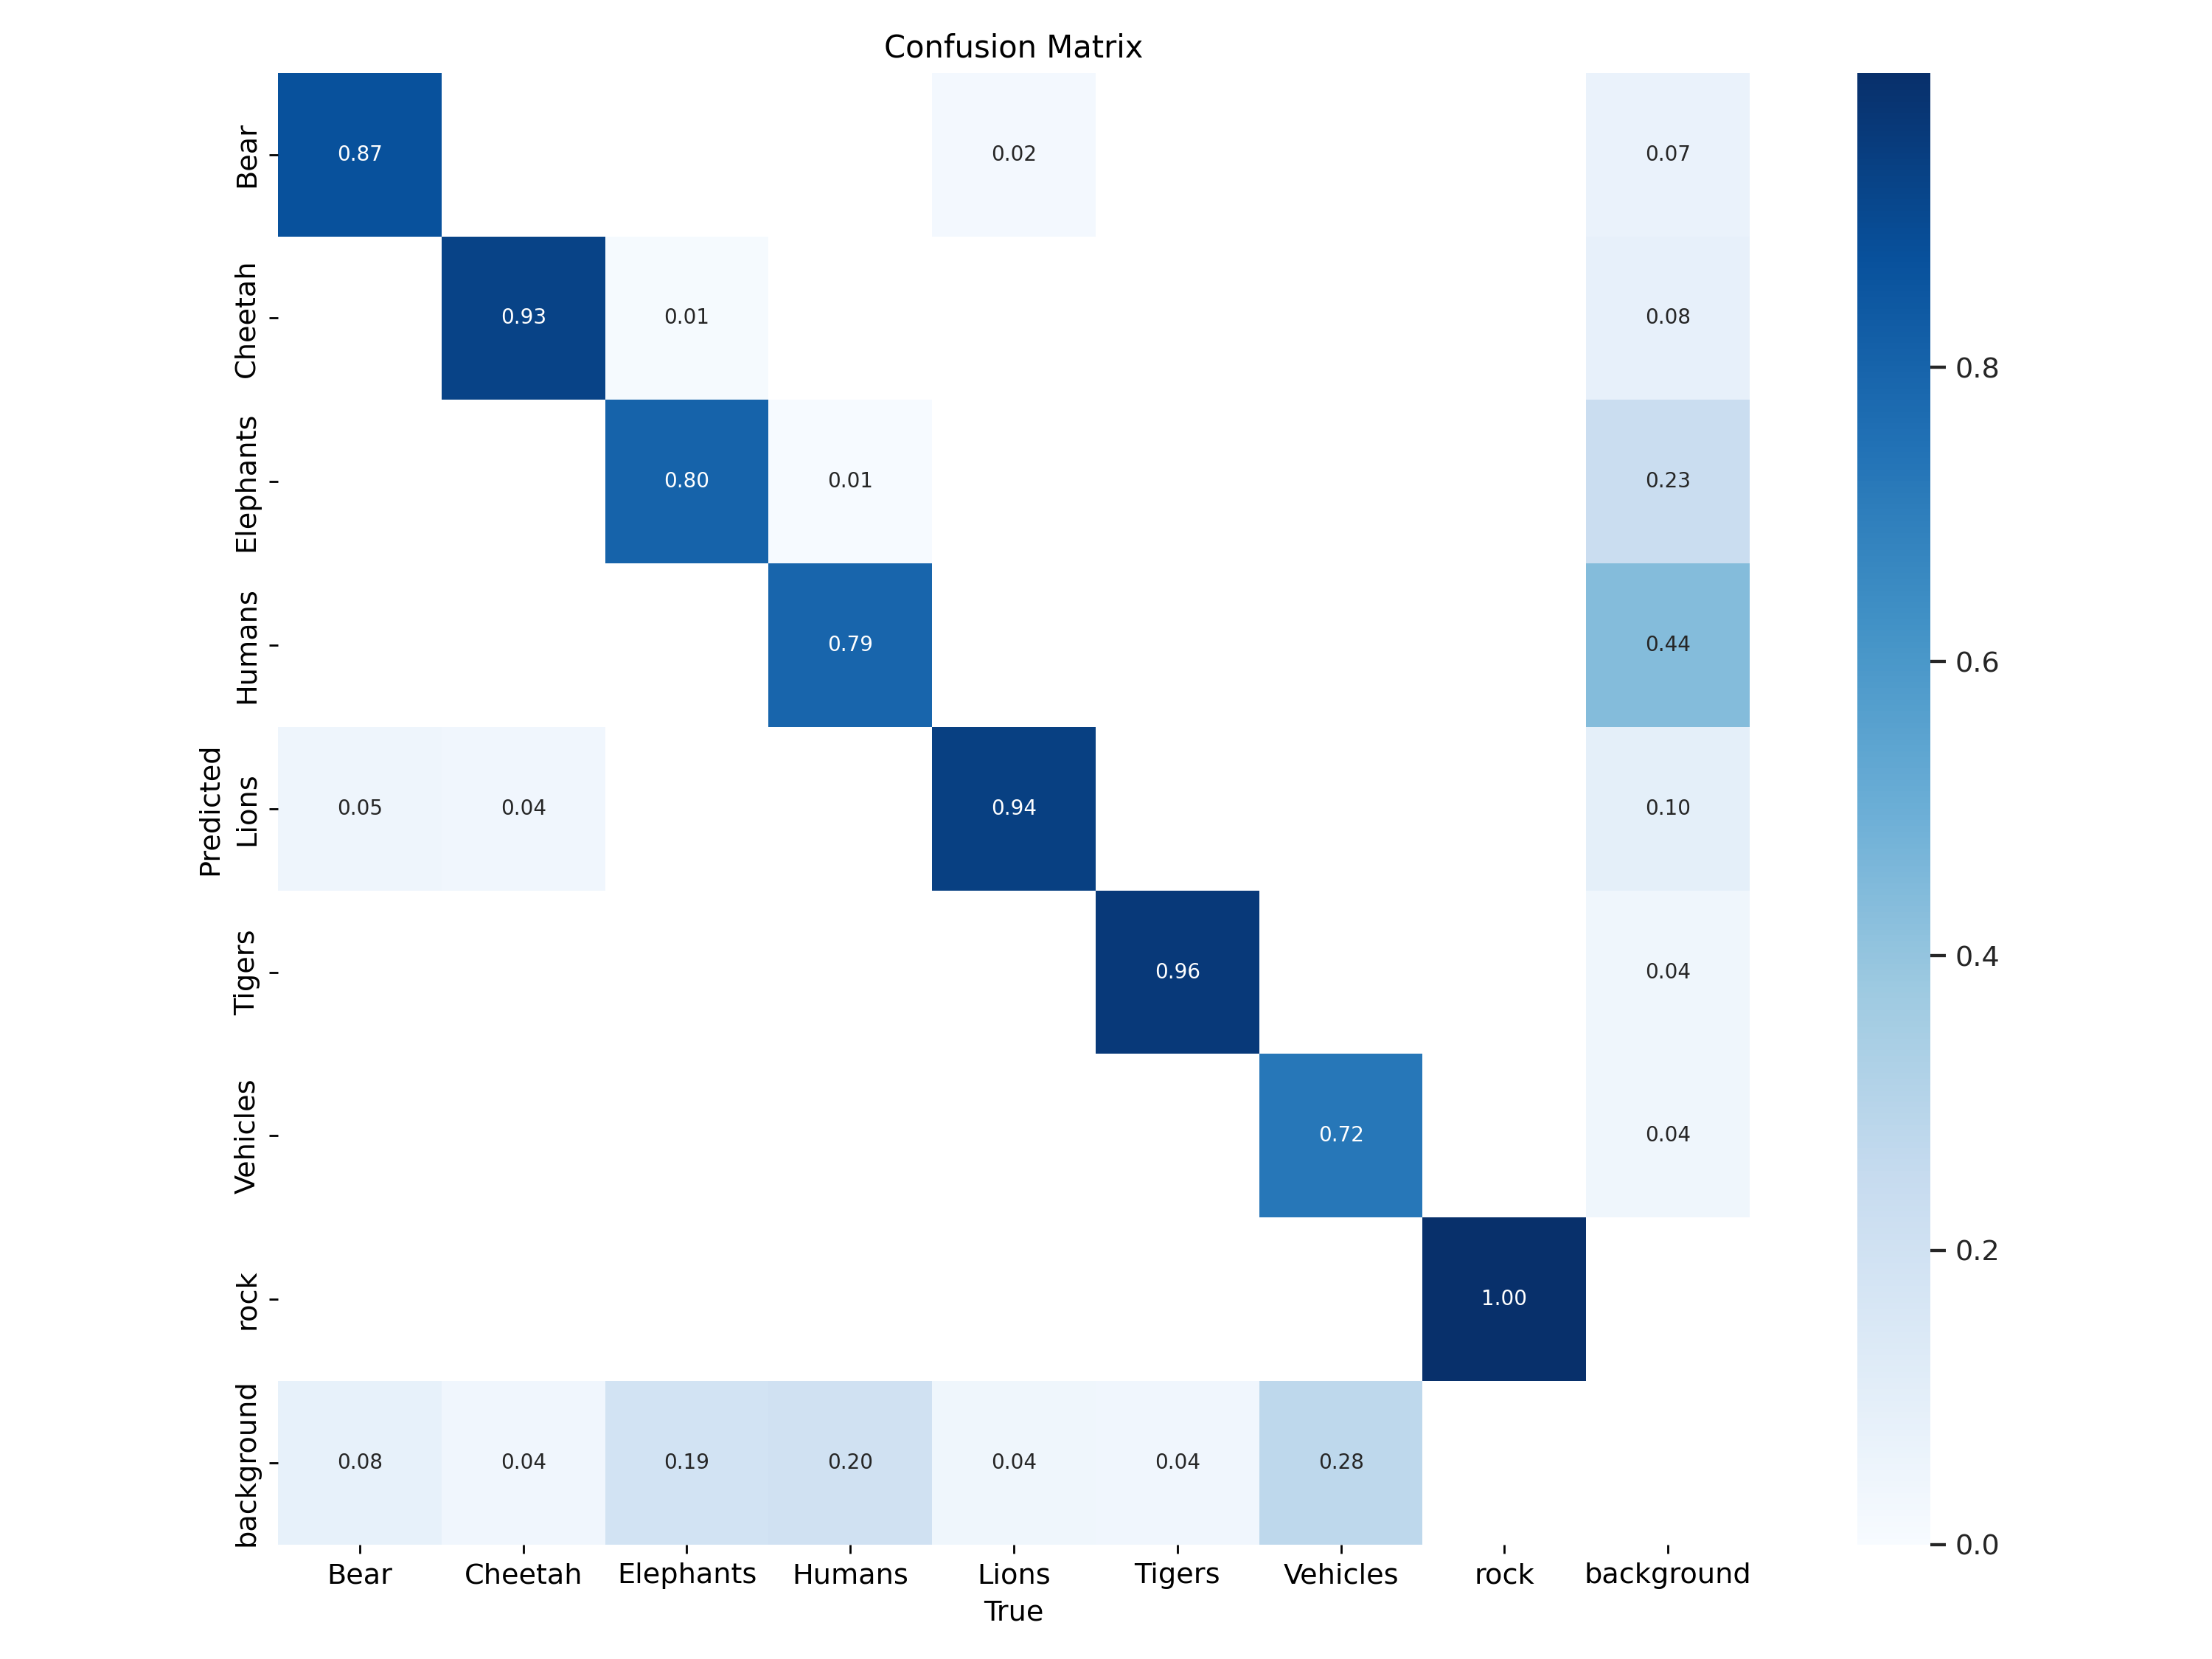

In [ ]:
Image(filename = "/content/yolov5/runs/train/yolov5m_results/confusion_matrix.png", width=500)

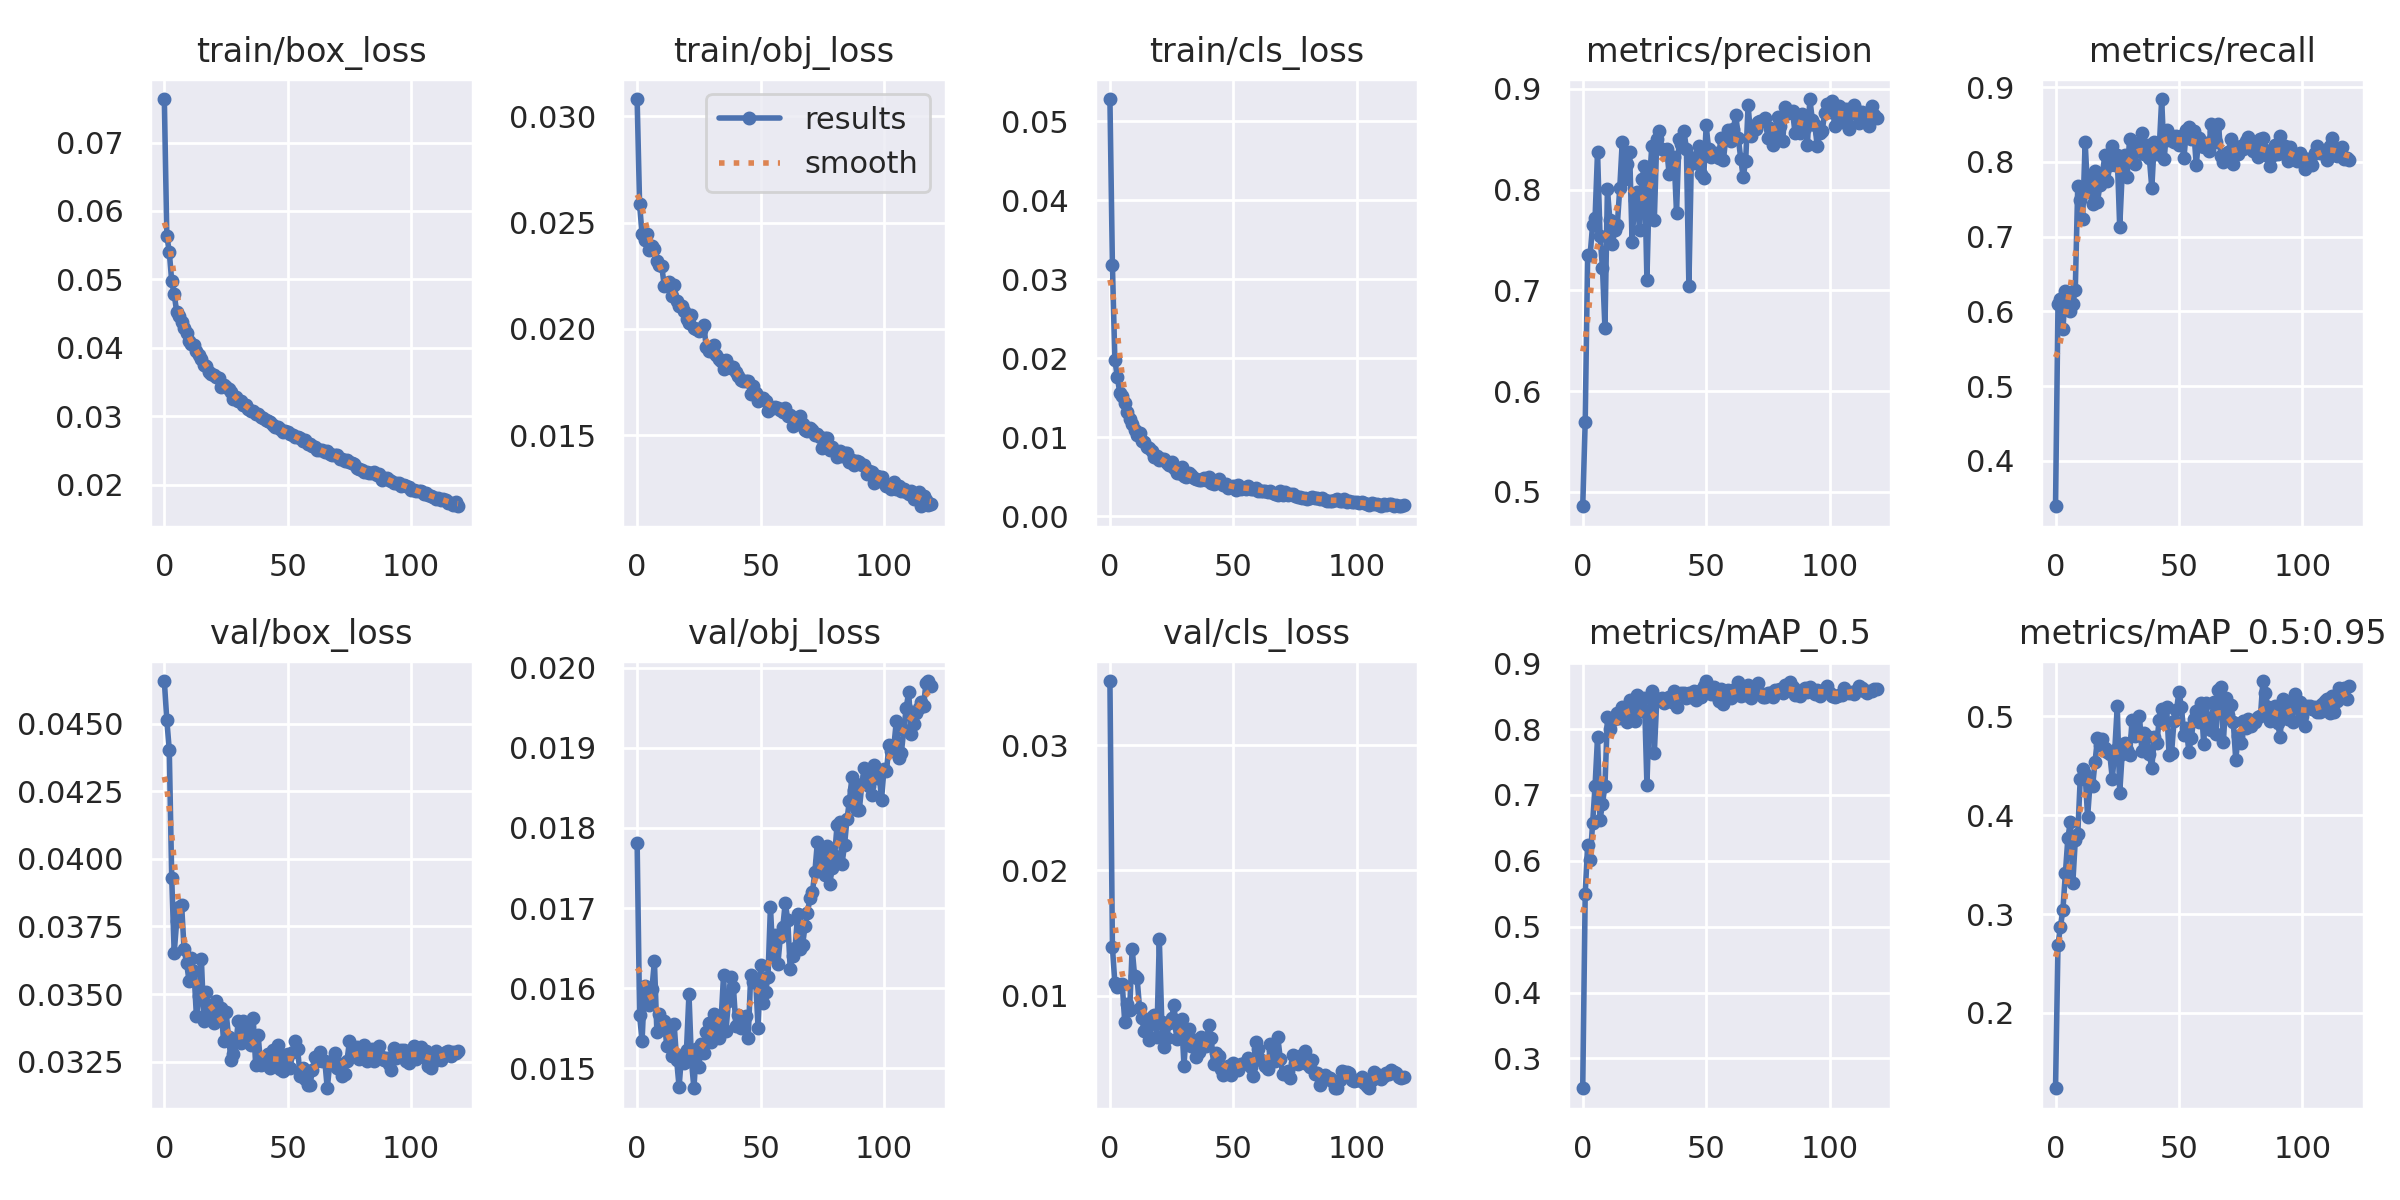

In [ ]:
Image(filename = "/content/yolov5/runs/train/yolov5m_results/results.png", width=500)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/yolov5/runs/train/yolov5m_results/results.csv")
print(df)

                   epoch        train/box_loss        train/obj_loss  \
0                      0              0.076355              0.030809   
1                      1              0.056507              0.025886   
2                      2              0.053767              0.024396   
3                      3              0.049833              0.024166   
4                      4              0.047290              0.024570   
..                   ...                   ...                   ...   
95                    95              0.018900              0.012713   
96                    96              0.018365              0.012212   
97                    97              0.018363              0.012475   
98                    98              0.018283              0.012444   
99                    99              0.018304              0.012554   

          train/cls_loss     metrics/precision        metrics/recall  \
0               0.052821               0.48574               0.

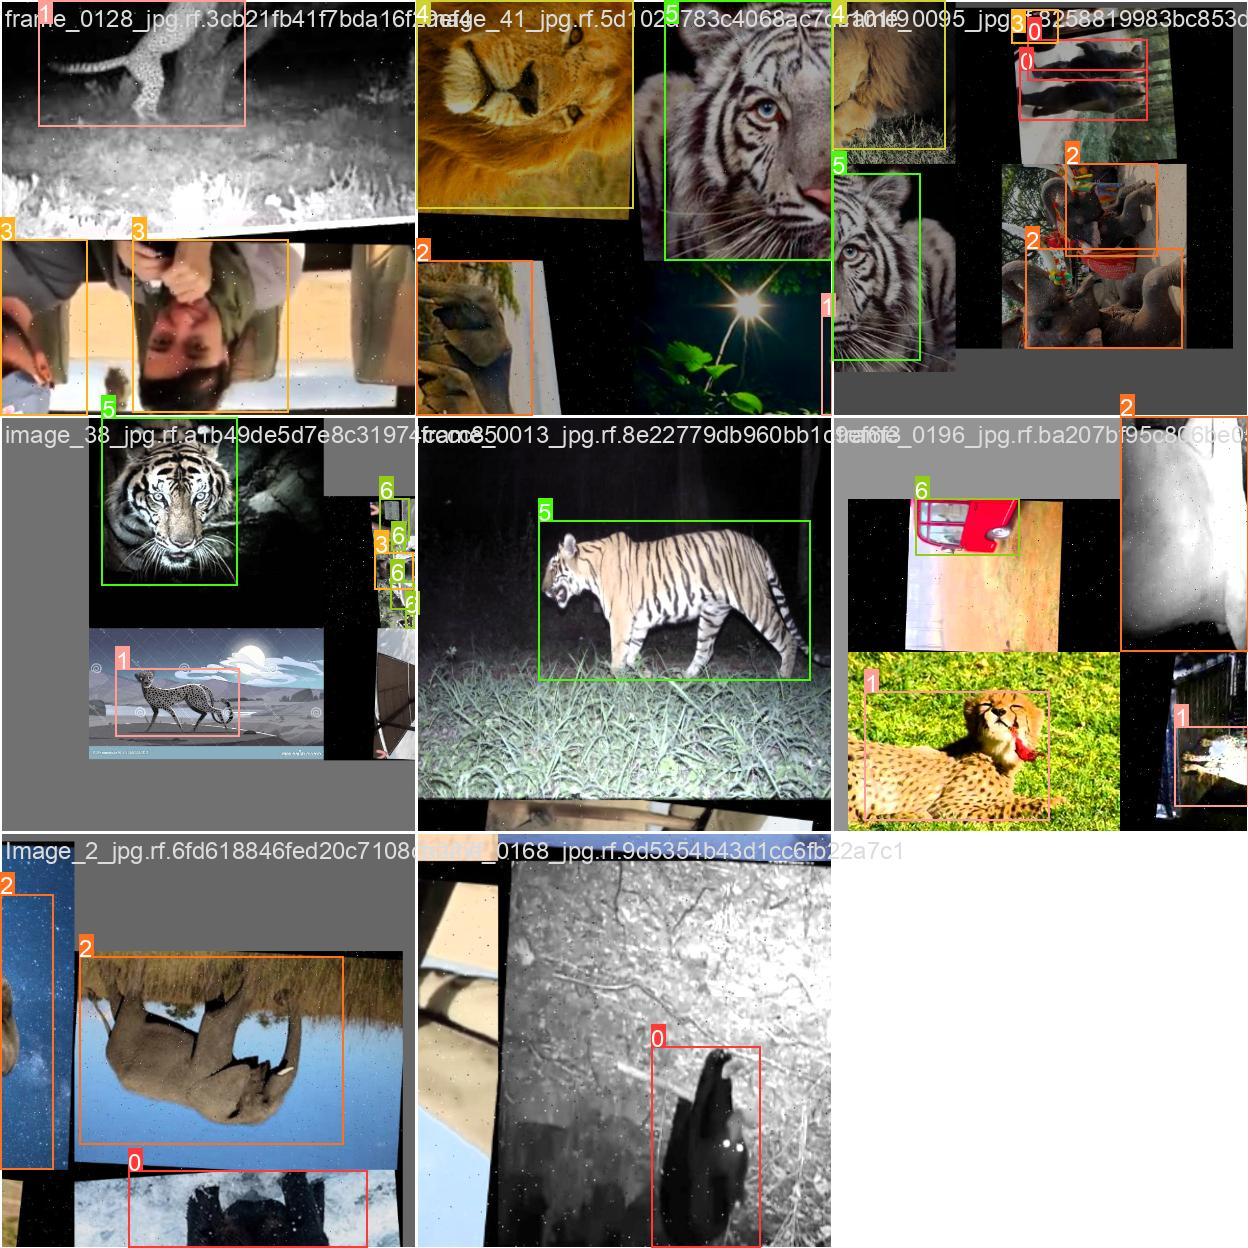

In [ ]:
Image(filename="/content/yolov5/runs/train/yolov5m_results/train_batch2.jpg", width=500)

In [ ]:
%ls /content/yolov5/runs/train/yolov5m_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt --img 412 --conf 0.5 --source /content/yolov5/Wildlife-detection-4/test/images

[Errno 2] No such file or directory: '/content/yolov5/yolov5'
/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=/content/yolov5/Wildlife-detection-4/test/images, data=data/coco128.yaml, imgsz=[412, 412], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size [412, 412] must be multiple of max stride 32, updating to [416, 416]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/236 /content/yolov5/Wildlife-detecti

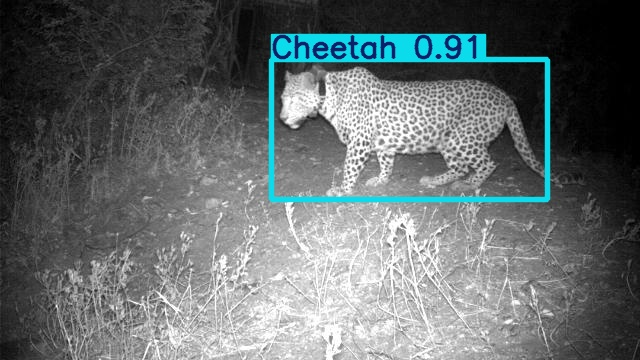

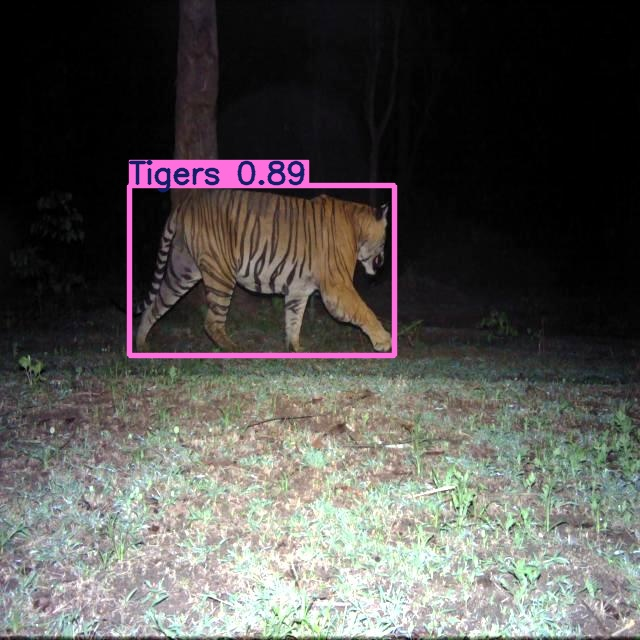

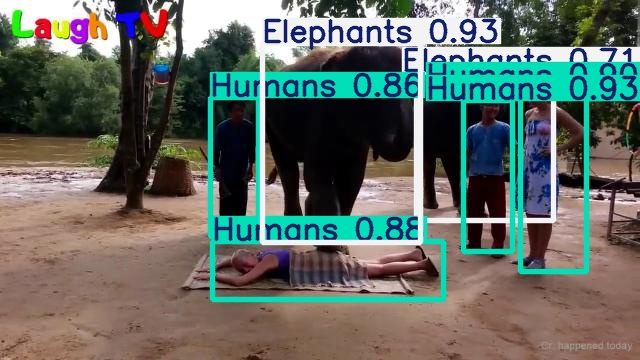

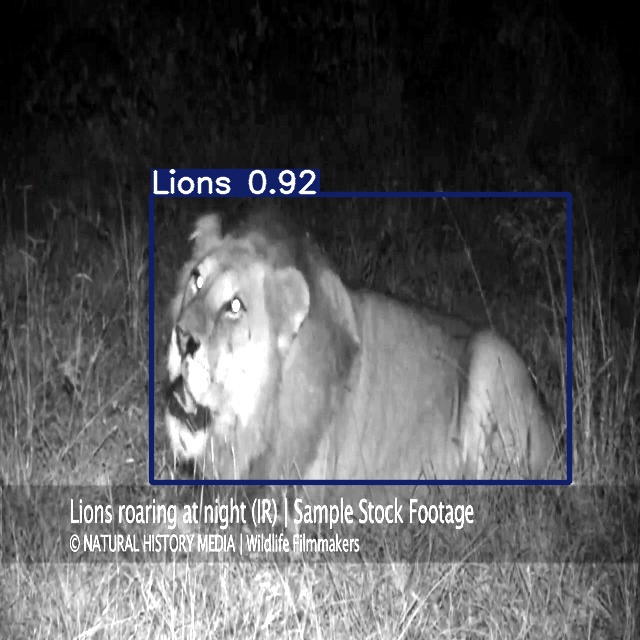

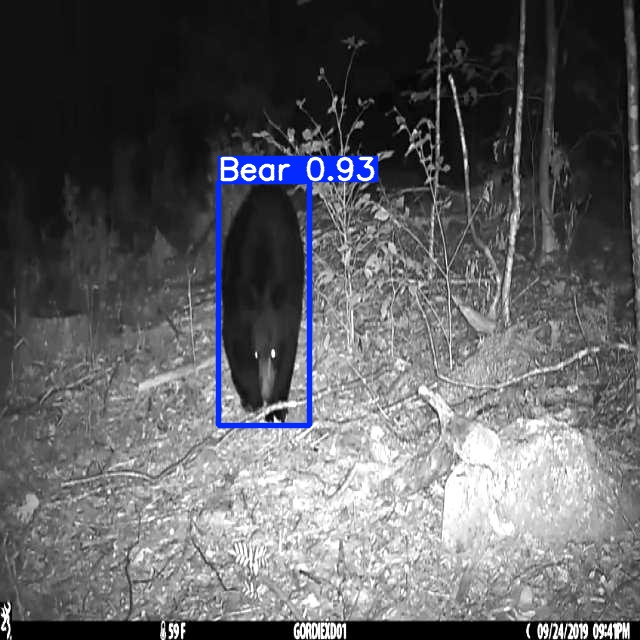

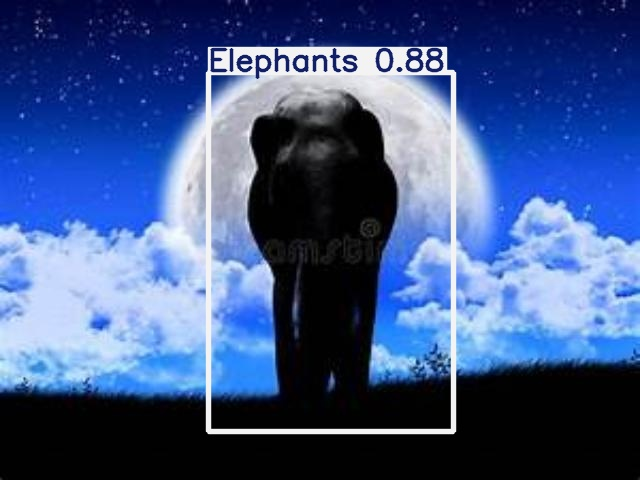

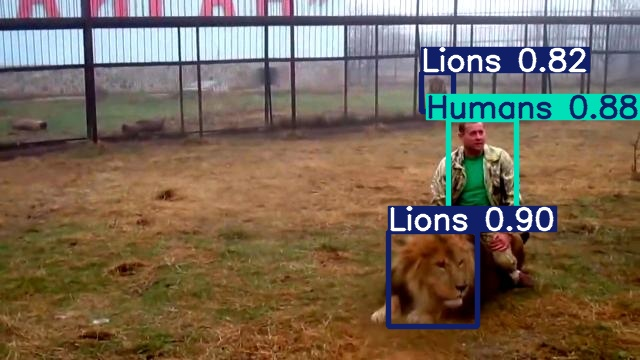

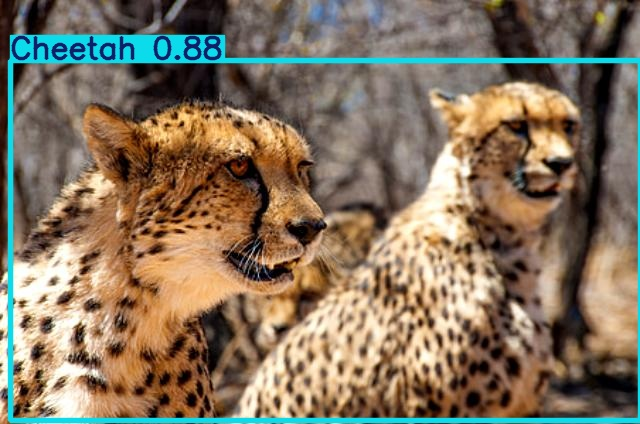

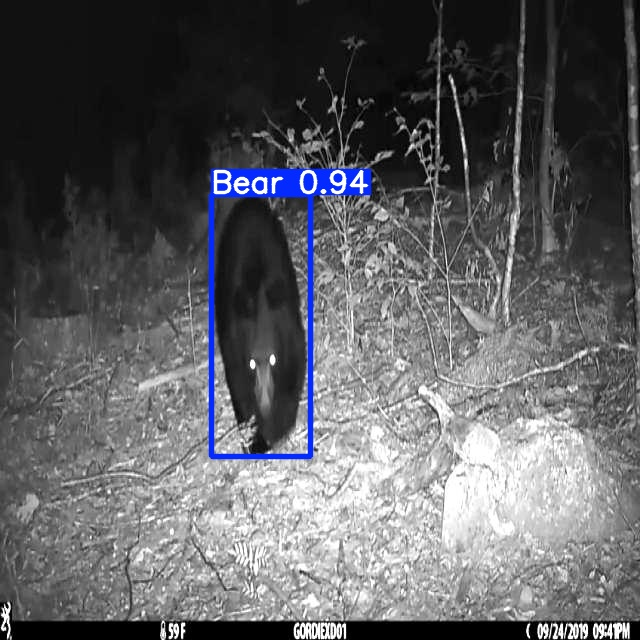

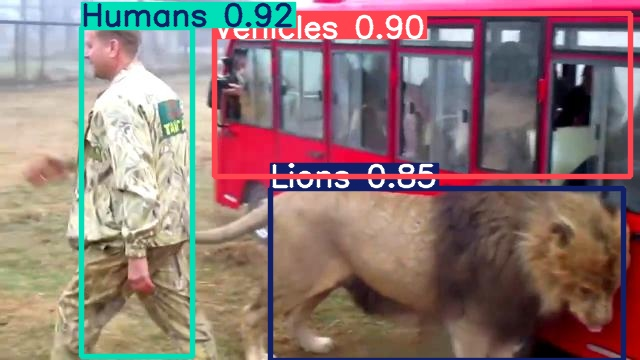

In [ ]:
import glob
from IPython.display import Image, display

# Ensure you point to the correct directory where the detection images are saved
image_path = "/content/yolov5/runs/detect/exp"  # Change exp if necessary

# Display first 10 images in the folder
for image_name in glob.glob(f"{image_path}/*.jpg")[:10]:
    display(Image(filename=image_name))


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 24.4 MB/s eta 0:00:00


In [ ]:
%cd /content/yolov5/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt --img 412 --conf 0.5 --source "/content/Woman Climbs Over Tiger s Fence at The Zoo To Get Her Hat Back.mp4"

[Errno 2] No such file or directory: '/content/yolov5/yolov5'
/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=/content/Woman Climbs Over Tiger s Fence at The Zoo To Get Her Hat Back.mp4, data=data/coco128.yaml, imgsz=[412, 412], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size [412, 412] must be multiple of max stride 32, updating to [416, 416]
video 1/1 (1/1865) /content/Woman Climbs Over Tiger s Fence

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/detect/exp4/CCTV footage of Elephant Attack in Wellawaya #elephantattack #wellawaya.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt --img 416 --conf 0.5 --source 0

detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=0, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@3.712] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@3.713] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
Traceback (most 

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/yolov5m_results/weights/best.pt')
files.download('/content/yolov5/runs/train/yolov5m_results')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>